<a href="https://colab.research.google.com/github/dixitritik17/ritik/blob/master/COVID_detection_using_symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dataprep

     |████████████████████████████████| 194kB 16.2MB/s 
     |████████████████████████████████| 10.1MB 38.7MB/s 
     |████████████████████████████████| 368kB 52.8MB/s 
     |████████████████████████████████| 1.3MB 49.0MB/s 
     |████████████████████████████████| 1.5MB 50.0MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 849kB 50.4MB/s 
     |████████████████████████████████| 727kB 50.8MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 296kB 25.6MB/s 
     |████████████████████████████████| 143kB 40.2MB/s 
     |████████████████████████████████| 112kB 50.0MB/s 
  Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
   

In [ ]:
import pandas as pd
import numpy as np
import re

# data visualization library 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [ ]:
# dataprep
from dataprep.eda import *
from dataprep.eda.missing import plot_missing
from dataprep.eda import plot_correlation

NumExpr defaulting to 2 threads.


In [ ]:
covid = pd.read_csv("Covid Dataset.csv")
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No


In [ ]:
covid.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [ ]:
covid.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

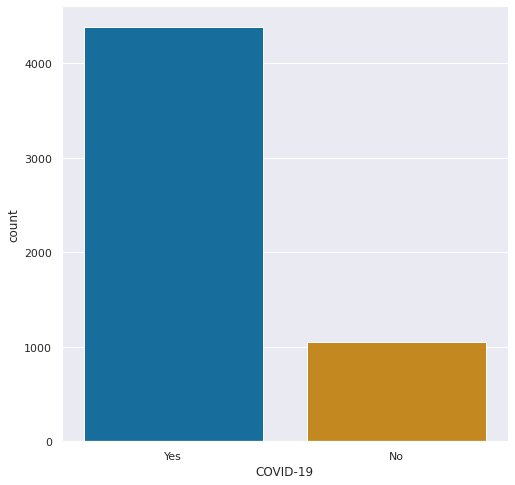

In [ ]:
sns.countplot(x='COVID-19',data=covid)

Feature Transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [ ]:
covid['Breathing Problem']=e.fit_transform(covid['Breathing Problem'])
covid['Fever']=e.fit_transform(covid['Fever'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Running Nose']=e.fit_transform(covid['Running Nose'])
covid['Asthma']=e.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=e.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=e.fit_transform(covid['Headache'])
covid['Heart Disease']=e.fit_transform(covid['Heart Disease'])
covid['Diabetes']=e.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=e.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=e.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=e.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=e.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=e.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=e.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=e.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=e.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=e.fit_transform(covid['COVID-19'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=e.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=e.fit_transform(covid['Fatigue '])

In [ ]:
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


In [ ]:
corr=covid.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


In [ ]:
covid=covid.drop('Running Nose',axis=1)
covid=covid.drop('Chronic Lung Disease',axis=1)
covid=covid.drop('Headache',axis=1)
covid=covid.drop('Heart Disease',axis=1)
covid=covid.drop('Diabetes',axis=1)
covid=covid.drop('Gastrointestinal ',axis=1)
covid=covid.drop('Wearing Masks',axis=1)
covid=covid.drop('Sanitization from Market',axis=1)
covid=covid.drop('Asthma',axis=1)
covid=covid.drop('Fatigue ',axis=1)

In [ ]:
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,0,0,1,1,0,1
2,1,1,1,1,0,1,0,0,0,0,1
3,1,1,1,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
x=covid.drop('COVID-19',axis=1)
y=covid['COVID-19']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
#Score/Accuracy
acc_svc=clf.score(x_test, y_test)*100
acc_svc

96.93627450980392

In [ ]:
y_pred[:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: COVID-19, dtype: int64

In [ ]:
matrix = []
print("Enter whether you have following symptom or not Y(1) N(0)")
w=[]

print("Breathing Problem")
w.append(int(input()))

print("Fever")
w.append(int(input()))

print("Dry Cough")
w.append(int(input()))

print("Sore throat")
w.append(int(input()))

print("Hyper Tension")
w.append(int(input()))

print("Abroad travel")
w.append(int(input()))

print("Contact with COVID Patient")
w.append(int(input()))

print("Attended Large Gathering")
w.append(int(input()))

print("Visited Public Exposed Places")
w.append(int(input()))

print("Family working in Public Exposed Places")
w.append(int(input()))

matrix.append(w)

y_pred = clf.predict(matrix)
if y_pred==1:
  print("You are covid POSITIVE")
else:
  print("You are covid NEGATIVE")


Enter whether you have following symptom or not Y(1) N(0)
Breathing Problem
1
Fever
1
Dry Cough
1
Sore throat
0
Hyper Tension
1
Abroad travel
0
Contact with COVID Patient
1
Attended Large Gathering
1
Visited Public Exposed Places
1
Family working in Public Exposed Places
1
You are covid POSITIVE


In [ ]:
y_pred = clf.predict(matrix)
if y_pred==1:
  print("You are covid POSITIVE\n")
  print("Treatments: \n")
  print("1. Isolate yourself in a well ventilated room.\n")
  print("2. Take rest and drink a lot of fluids to maintain adequate hydration.\n")
  print("3. Follow respiratory etiquettes at all times.\n")
  print("4. Frequent hand washing with soap and water for at least 40 seconds or clean with alcohol-based sanitizer.\n ")
  print("5. perform warm water gargles or take steam inhalation twice a day.\n")
  print("For more treatments visit: https://www.google.com/search?q=coronavirus&oq=coro&aqs=chrome.2.69i57j35i39j0i131i433l2j0i131i433i457j69i65l3.2097j0j9&sourceid=chrome&ie=UTF-8#wptab=s:H4sIAAAAAAAAAONgVuLVT9c3NMwySk6OL8zJecTozS3w8sc9YSmnSWtOXmO04eIKzsgvd80rySypFNLjYoOyVLgEpVB1ajBI8XOhCvHsYhLwSE3MKckIKUpNLMlNzSspXsQqlpxflJ-XWJZZVFqsUAKXAAAEZq0IiwAAAA")

else:
  print("You are covid NEGATIVE")

You are covid POSITIVE

Treatments: 

1. Isolate yourself in a well ventilated room.

2. Take rest and drink a lot of fluids to maintain adequate hydration.

3. Follow respiratory etiquettes at all times.

4. Frequent hand washing with soap and water for at least 40 seconds or clean with alcohol-based sanitizer.
 
5. perform warm water gargles or take steam inhalation twice a day.

For more treatments visit: https://www.google.com/search?q=coronavirus&oq=coro&aqs=chrome.2.69i57j35i39j0i131i433l2j0i131i433i457j69i65l3.2097j0j9&sourceid=chrome&ie=UTF-8#wptab=s:H4sIAAAAAAAAAONgVuLVT9c3NMwySk6OL8zJecTozS3w8sc9YSmnSWtOXmO04eIKzsgvd80rySypFNLjYoOyVLgEpVB1ajBI8XOhCvHsYhLwSE3MKckIKUpNLMlNzSspXsQqlpxflJ-XWJZZVFqsUAKXAAAEZq0IiwAAAA
